<a href="https://colab.research.google.com/github/Meridor6919/BeeClassification/blob/Functional-API/dataAugtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = tfds.load('bee_dataset', split=['train'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/7490 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/bee_dataset/bee_dataset_300/1.0.0.incomplete5OI0GU/bee_dataset-train.tfrecord*…

Dataset bee_dataset downloaded and prepared to ~/tensorflow_datasets/bee_dataset/bee_dataset_300/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Split between training data, validation data, test data
splitSize = (0.0, 0.765, 0.9, 1.0)

array = np.vstack(list(tfds.as_numpy(dataset[0])))

ranges = list([int(array.shape[0] * x) for x in splitSize])

def getDataset(ranges, idx):
    return (
        np.array(list(map(lambda x: x[0][:, :, 0], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['cooling_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['pollen_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['varroa_output'], array[ranges[idx]: ranges[idx + 1]]))),
        np.array(list(map(lambda x: x[1]['wasps_output'], array[ranges[idx]: ranges[idx + 1]])))
    )

# 0 - train, 1 - validation, 2 - test

# wszystkie dane na raz (z 4 parametrow robimy wektory czteroelementowe)
labels_all = [None] * 3
images = [None] *3 
for i in range(3):
    helper = getDataset(ranges, i)
    images[i] = helper[0]
    labels_all[i] = np.column_stack((helper[1], helper[2], helper[3], helper[4]))

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [ ]:
_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(32, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(62, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='tanh')(x)
_output = layers.Dense(4)(x)


model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=30)

print(max(history_all.history['accuracy']))

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Epoch 1/30
180/180 [==============================] - 21s 61ms/step - loss: 0.7823 - accuracy: 0.3699 - val_loss: 0.7649 - val_accuracy: 0.3992
Epoch 2/30
180/180 [==============================] - 10s 58ms/step - loss: 0.7016 - accuracy: 0.4676 - val_loss: 0.8044 - val_accuracy: 0.5741
Epoch 3/30
180/180 [==============================] - 10s 57ms/step - loss: 0.6175 - accuracy: 0.5120 - val_loss: 0.6716 - val_accuracy: 0.6512
Epoch 4/30
180/180 [==============================] - 10s 57ms/step - loss: 0.5606 - accuracy: 0.5247 - val_loss: 0.6253 - val_accuracy: 0.3291
Epoch 5/30
180/180 [==============================] - 10s 58ms/step - loss: 0.5220 - accuracy: 0.5282 - val_loss: 0.5529 - val_accuracy: 0.4694
Epoch 6/30
180/180 [==============================] - 10s 58ms/step - loss: 0.4904 - accuracy: 0.5348 - val_loss: 0.5453 - val_accuracy: 0.3893
Epoch 7/30
180/180 [==============================] - 10s 58ms/step - loss: 0.4644 - accuracy: 0.5355 - val_loss: 0.5071 - val_accuracy:

In [ ]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 27ms/step - loss: 0.3410 - accuracy: 0.5554


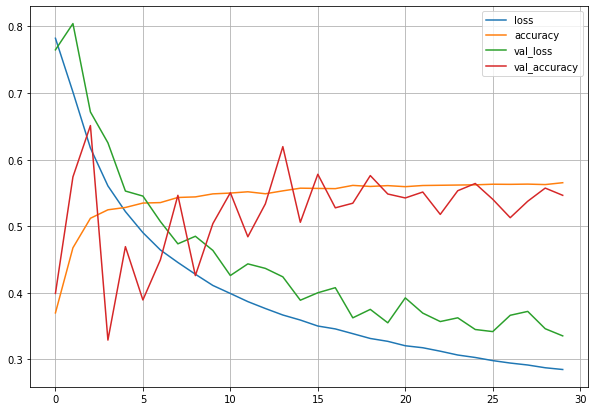

In [ ]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [ ]:
_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(64, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='tanh')(x)
_output = layers.Dense(4)(x)

model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=30)

print(max(history_all.history['accuracy']))

Epoch 1/30
180/180 [==============================] - 17s 91ms/step - loss: 0.7901 - accuracy: 0.3037 - val_loss: 0.9222 - val_accuracy: 0.5741
Epoch 2/30
180/180 [==============================] - 16s 91ms/step - loss: 0.7372 - accuracy: 0.3899 - val_loss: 0.7152 - val_accuracy: 0.5721
Epoch 3/30
180/180 [==============================] - 16s 91ms/step - loss: 0.6499 - accuracy: 0.4575 - val_loss: 0.6812 - val_accuracy: 0.2589
Epoch 4/30
180/180 [==============================] - 16s 90ms/step - loss: 0.5615 - accuracy: 0.5090 - val_loss: 0.5601 - val_accuracy: 0.4822
Epoch 5/30
180/180 [==============================] - 16s 90ms/step - loss: 0.4955 - accuracy: 0.5184 - val_loss: 0.5035 - val_accuracy: 0.5524
Epoch 6/30
180/180 [==============================] - 16s 90ms/step - loss: 0.4482 - accuracy: 0.5329 - val_loss: 0.4814 - val_accuracy: 0.4200
Epoch 7/30
180/180 [==============================] - 16s 90ms/step - loss: 0.4119 - accuracy: 0.5458 - val_loss: 0.4213 - val_accuracy:

In [ ]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 39ms/step - loss: 0.3007 - accuracy: 0.5701


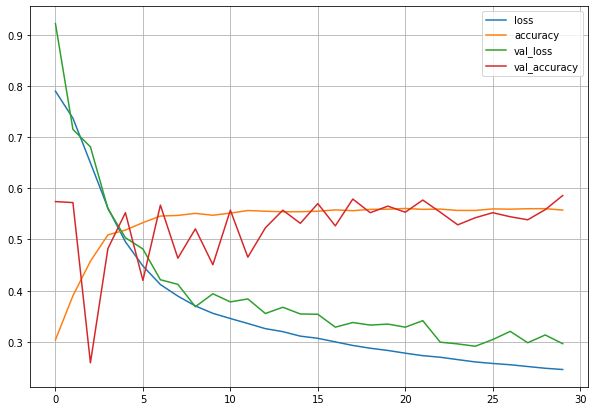

In [ ]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#images = np.expand_dims(images[0], axis=0)


_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(64, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='tanh')(x)
_output = layers.Dense(4)(x)


model_all = keras.Model(_input, _output, name="model_all")
model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(images[0].shape)
print(labels_all[0].shape)

datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)

training_generator = datagen.flow(images, labels_all[0], batch_size=64, subset='training', seed=7)
validation_generator = datagen.flow(images, labels_all[1], batch_size=64, subset='validation', seed=7)

history = model_all.fit_generator(training_generator,steps_per_epoch=(len(images)*0.8)//64, epochs=10, validation_data=validation_generator, validation_steps=(len(images)*0.2)//64)



# model_all = keras.Model(_input, _output, name="model_all")

# model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# history_all = model_all.fit(images[0], labels_all[0], batch_size=32,
#                           validation_data=(images[1], labels_all[1]), 
#                           validation_steps=images[1].shape[0]//32,
#                           epochs=20)

# #history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]),batch_size=32, epochs=20)

# print(max(history_all.history['accuracy']))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  training_images = np.expand_dims(images[0], axis=0)
  validation_images = np.expand_dims(images[1], axis=0)
  training_labels = np.expand_dims(labels_all[0], axis=0)
  validation_labels = np.expand_dims(labels_all[1], axis=0)
  training_labels = np.argmax(training_labels, axis=1)
  validation_labels = np.argmax(validation_labels, axis=1)

  print(training_images.shape)
  print(validation_images.shape)

  train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )
  
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 

  
  validation_datagen = ImageDataGenerator(
      rescale = 1./255
  )

  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

  return train_generator, validation_generator


train_generator, validation_generator = train_val_generators(
    training_images = np.random.rand(5729,28,28), 
    training_labels = np.random.randint(0,3,5729),
    validation_images = np.random.rand(1012,28,28),
    validation_labels = np.random.randint(0,3,1012),
    )

_input = keras.Input(shape=(300, 150, 1), name="img")
x = layers.Conv2D(128, (3, 3), activation='relu')(_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dropout(0.1)(x)
_output = layers.Dense(4)(x)

model_all = keras.Model(_input, _output, name="model_all")

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_all = model_all.fit(train_generator, validation_data=(validation_generator), epochs=10)

(1, 5729, 300, 150)
(1, 1012, 300, 150)


In [ ]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 40ms/step - loss: 0.3857 - accuracy: 0.5554


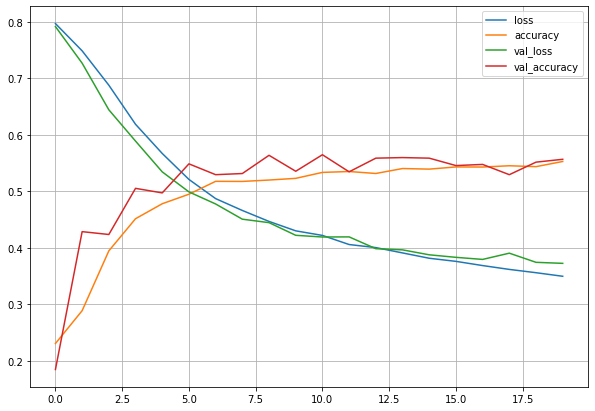

In [ ]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [ ]:
_input = keras.Input(shape=(300, 150, 1), name="img")
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
x = data_augmentation(_input)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(128, (3, 3), activation='swish')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dropout(0.1)(x)
_output = layers.Dense(4)(x)

model_all = keras.Model(_input, _output, name="model_all")
#print(model_all.summary())

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=20)

print(max(history_all.history['accuracy']))

Epoch 1/20
180/180 [==============================] - 20s 108ms/step - loss: 0.8150 - accuracy: 0.1543 - val_loss: 0.8348 - val_accuracy: 0.1621
Epoch 2/20
180/180 [==============================] - 19s 107ms/step - loss: 0.8278 - accuracy: 0.1681 - val_loss: 0.8190 - val_accuracy: 0.1621
Epoch 3/20
180/180 [==============================] - 19s 106ms/step - loss: 0.8272 - accuracy: 0.1873 - val_loss: 0.8183 - val_accuracy: 0.1621
Epoch 4/20
180/180 [==============================] - 19s 106ms/step - loss: 0.8292 - accuracy: 0.1815 - val_loss: 0.8175 - val_accuracy: 0.1621
Epoch 5/20
180/180 [==============================] - 19s 106ms/step - loss: 0.8240 - accuracy: 0.1889 - val_loss: 0.8162 - val_accuracy: 0.1621
Epoch 6/20
180/180 [==============================] - 19s 106ms/step - loss: 0.8220 - accuracy: 0.1964 - val_loss: 0.8080 - val_accuracy: 0.1621
Epoch 7/20
118/180 [==================>...........] - ETA: 6s - loss: 0.8198 - accuracy: 0.2018

In [ ]:
history_test = model_all.evaluate(images[2], labels_all[2])

24/24 [==============================] - 1s 40ms/step - loss: 0.6548 - accuracy: 0.5127


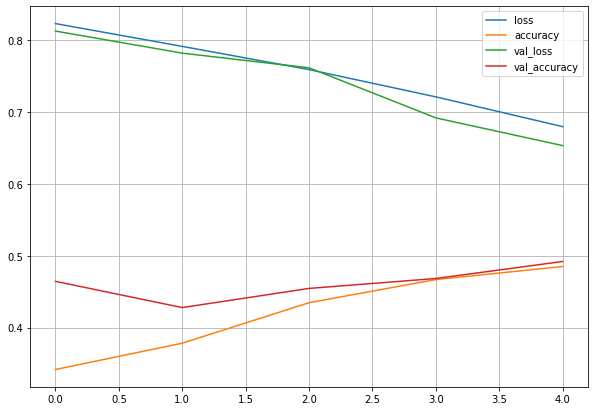

In [ ]:
pd.DataFrame(history_all.history).plot(figsize=(10, 7))
plt.grid(True)

In [4]:
_input = keras.Input(shape=(300, 150, 1), name="img")
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
x = data_augmentation(_input)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(256, (3, 3), activation='swish')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='tanh')(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='tanh')(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dropout(0.1)(x)
_output = layers.Dense(4)(x)

model_all = keras.Model(_input, _output, name="model_all")



#print(model_all.summary())

model_all.compile(optimizer=tf.keras.optimizers.Adadelta(), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history_all = model_all.fit(images[0], labels_all[0], validation_data=(images[1], labels_all[1]), epochs=20)

#print(max(history_all.history['accuracy']))

Epoch 1/20
180/180 [==============================] - 76s 354ms/step - loss: 0.8147 - accuracy: 0.1821 - val_loss: 0.8231 - val_accuracy: 0.1393
Epoch 2/20
180/180 [==============================] - 63s 349ms/step - loss: 0.8281 - accuracy: 0.2178 - val_loss: 0.8269 - val_accuracy: 0.1522
Epoch 3/20
180/180 [==============================] - 63s 350ms/step - loss: 0.8356 - accuracy: 0.2426 - val_loss: 0.8250 - val_accuracy: 0.1522
Epoch 4/20
180/180 [==============================] - 63s 349ms/step - loss: 0.8377 - accuracy: 0.2437 - val_loss: 0.8209 - val_accuracy: 0.2856
Epoch 5/20
179/180 [============================>.] - ETA: 0s - loss: 0.8325 - accuracy: 0.2428

KeyboardInterrupt: ignored